# Your Name Here: Rhami Thrower

# A3 LogisticRegression, Multi-layer Perceptron (MLP)

## 1. Load data and perform general EDA (3+2+1+3+6 = 15pts)

### 1.1 import libraries: numpy, matplotlib.pyplot and pandas. (1+1+1 = 3pts)

You can import other libraries below as needed in any block.

In [ ]:
# TODO
import numpy as np, matplotlib.pyplot as plt, pandas as pd

### 1.2 import the data to a pandas dataframe and show the count of rows and columns (2pts)

In [ ]:
# uncomment the following line if you are running this code in google colab and have uploaded the dataset to your drive
from google.colab import drive
drive.mount('/content/drive')

# TODO
file_name = '/content/drive/MyDrive/Colab Notebooks/Wine_Quality_Data.csv'
df = pd.read_csv(file_name)
print("Row # = ", len(df.index)+1)
print("Column # = ", len(list(df)))

Mounted at /content/drive
Row # =  6498
Column # =  13


### 1.3 Show if any column has null values. (1pt)

In [ ]:
# TODO
names = list(df)
for col in names:
  if df[col].isna().any():
    print(col)

### 1.4 We will use the 'quality' column as our target label. Print the count of each label in the dataset (in percentage). Mention which quality scores are among top 3 by their counts. (3pts)

In [ ]:
# TODO
r = df['quality'].max()

count = {}
for i in range(r + 1):
  count[i] = 0

for i,r in df['quality'].iteritems():
  if r in count:
    count[r] = count[r] + 1
  else:
    count[r] = 1
count = dict(sorted(count.items(), key = lambda item: item[1], reverse = True))

for key in count.keys():
  print(key, " count = ", count[key])

6  count =  2836
5  count =  2138
7  count =  1079
4  count =  216
8  count =  193
3  count =  30
9  count =  5
0  count =  0
1  count =  0
2  count =  0


The top three qualities are 6, 5, and 7 with their counts being 2836, 2138, 1079

### 1.5 Observe the correlation matrix for the columns. Name the pairs of columns with highest positive and highest negative correlations. (2+4 = 6pts)

You can import and use seaborn here to visualize correlation matrix in a heatmap.

<Axes: >

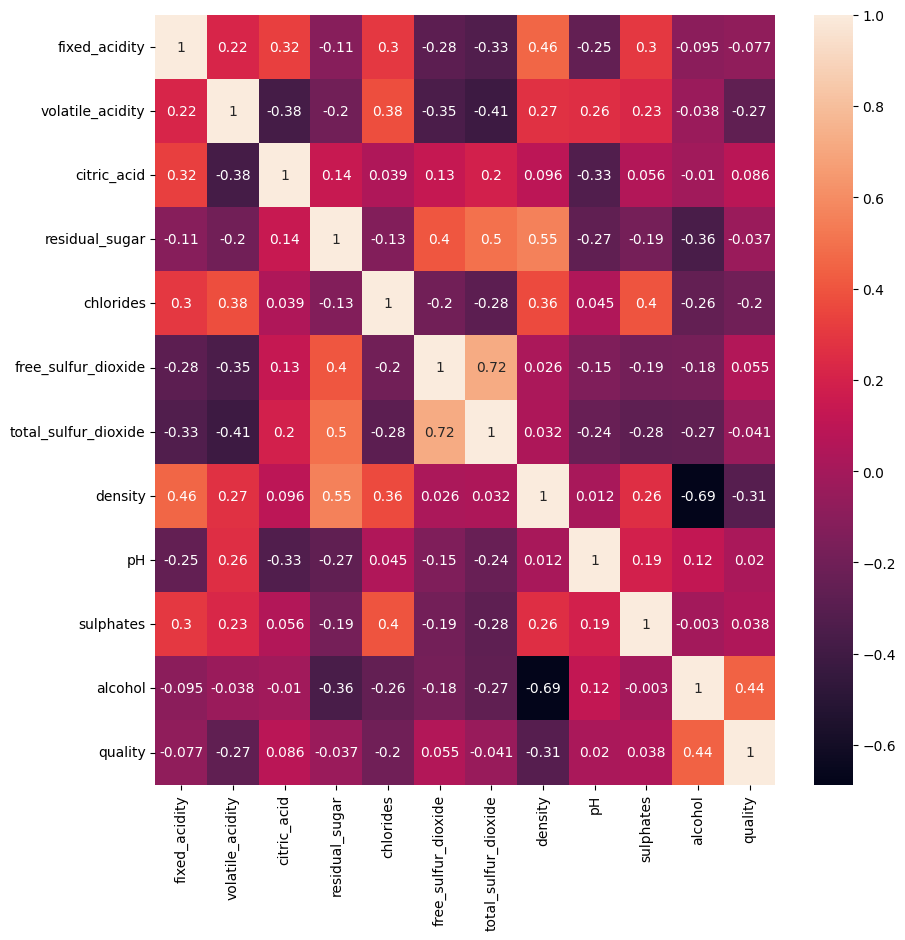

In [ ]:
# TODO
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True,annot_kws={'size': 10})


The pairs with the highestcorrelation is chlorides and volatile acidity, alcohol and quality, and density and residual sugar.
The pairs with the lowest correlation are alcohol and density, and volatile acidity and total sulfure dioxide

## 2. Feature Selection and Preprocessing (2+2+3+3 = 10pts)

### 2.1 Drop the 'color' attribute from the dataframe. (2pts)

In [ ]:
# TODO
df = df.drop(['color'], axis = 1, errors = 'ignore')

### 2.2 Assign the 'quality' column to target label y, and all other columns to attribute matrix X (1+1 = 2pts)

In [ ]:
# TODO
y = df['quality'].copy()
x = df.loc[:, df.columns != "quality"].copy()

### 2.3 Use scikitlearn's Standard Scaler to scale the feature matrix X. (3pts)

In [ ]:
# TODO
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

### 2.4 Split Dataset into Training and Test set. (3 pts)
Use 80:20 split for training and test. Also use stratified sampling to ensure balanced dataset.

In [ ]:
# TODO
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify = y, test_size = 0.2, random_state= 42)

## 3. Logistic Regression from scratch (10+10+10+25+20 = 75pts)


In this section, you will write a logistic regression algorithm from scratch using python and numpy. You will first write some helper functions for transforming label encoding to one-hot encoding, for measuring the cross-entropy loss and predicting labels from test data. These functions will later be used in the logistic regression training and testing.   

### 3.1 The target label in our dataset is the 'quality' column. It consists of categorical values, label-encoded with 7 values in the range [3-9]. To perform a multiclass logistic regression, you need a function that takes a label matrix and converts it to One-hot encoded labels. (10pts)

Write the function below following the docstring.

In [ ]:

def onehot(y):
    """
    Converts an array of labels to one-hot encoding.

    Parameters:
    -----------
    y : numpy.ndarray
        An array of labels. It must have a shape of (n_samples, ).

    Returns:
    --------
    numpy.ndarray
        A matrix of one-hot encoding. It has a shape of (n_samples, n_classes).
    """
    # TODO
    # values are shifted
    shift = 0
    uniqueLabels = np.unique(y)
    totalULabels = len(uniqueLabels)
    encodedLabels = np.zeros(shape = (totalULabels,totalULabels))
    changedMatrix = []

    for label in range(totalULabels):
      encodedLabels[label, label] = 1
    for labels in y:
      changedMatrix.append(encodedLabels[labels - 3])
    return(np.array(changedMatrix))



### 3.2 For multi-class classification, you also need to measure cross-entropy loss. Cross-entropy loss is measured by the following formula:
$\text{Cross-Entropy Loss} = -\frac{1}{N} \sum_{i=1}^N \sum_{j=1}^n y_{ij} \log \hat{y}_{ij}$

Write a function that takes two matrices: one matrix of true labels $y_{ij}$, and one matrix of the predicted labels by your model $\hat{y}_{ij}$ (you are about to write the model function soon below), and returns the computed loss. **(10pts)**


In [ ]:
#try writing function without import

def cross_entropy_loss(y_true, y_pred):
    """
    Computes the cross-entropy loss between the true labels and predicted labels.

    Parameters
    ----------
    y_true : numpy array
        Array of true labels with shape (m, n_classes).
    y_pred : numpy array
        Array of predicted labels with shape (m, n_classes).

    Returns
    -------
    float
        Cross-entropy loss between y_true and y_pred.

    Notes
    -----
    This function assumes that the labels are one-hot encoded.
    """
    # TODO

    N = y_true.shape[0]
    return -1/N * np.sum(y_true * np.log(y_pred))

### 3.3 Write a function for softmax activation to compute probabilities from the linear score $z_i$. Softmax function uses the following formula:
$$\sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{k}e^{z_j}} , \text{for } i=1,2,3,...,k $$
where $z_i$ is the linear layer score for i-th input.   

**(10pts)**

In [ ]:
# Something might go off here
def softmax(scores):
    """
    Compute the softmax of the given scores.

    Parameters:
    -----------
    scores : numpy.ndarray
        A 2D numpy array of shape (m, n), where m is the number of samples and n is the number of classes.

    Returns:
    --------
    probs : numpy.ndarray
        A 2D numpy array of shape (m, n) containing the probabilities of each sample belonging to each class.
    """
    # TODO
    denominator = np.sum(np.exp(scores), axis=1, keepdims=True)
    return np.exp(scores)/denominator




### 3.4 Model development (20+5 = 25pts)

**3.4.1** Write a function for the logistic regression algorithm. You will use the functions you have written above in this module. Recall that with gradient descent optimization, the computation loop goes as:
For each epoch:
1. Compute $scores = X_{train} W + b$
2. Compute probability = softmax(scores)
3. Compute Cross-entropy Loss
4. Compute gradients of the loss with respect to the weights and bias.

    Partial derivative of Loss with respect to Weight matrix:
    $$\frac{\partial L}{\partial W} = -\frac{1}{m} X^T \left(y - \hat{y}\right)$$

    Partial derivative of Loss with respect to Bias matrix:
    $$\frac{\partial L}{\partial b_j} = -\frac{1}{m} \sum_{i=1}^m \left(y_{ij} - p_{ij}\right) $$

5. Update the weights and biases
    $$ W = W - (learning\ rate * weight\ gradient)  $$
    $$ b = b - (learning\ rate * weight\ gradient)  $$

**(20pts)**

In [ ]:
def logistic_regression(X_train, y_train ):
    """
    Performs logistic regression using softmax activation and gradient descent optimizer to classify the input data.

    Parameters:
    -----------
    X_train : numpy.ndarray
        The input training data of shape (num_samples, num_features).
    y_train : numpy.ndarray
        The training labels of shape (num_samples,).

    Returns:
    --------
    W : numpy.ndarray
        The learned weights of shape (num_features, num_classes).
    b : numpy.ndarray
        The learned bias of shape (1, num_classes).
    loss_list : list
        The list of loss values at each epoch during training.
    """

    # get the number of samples and features from X_train (2pts)
    # TODO
    numSamples = len(x_train[:,0])
    numfeatures = len(x_train[0,:])
    # convert training labels to one-hot encoded labels (2pts)
    # TODO
    y_train_oh = onehot(y_train)
    # get the number of target classes from y_train (2pts)
    # TODO
    classes = len(y_train.unique())
    # initialize the weights and bias with numpy arrays of zeros (1+1 = 2pts)
    # TODO
    weights = np.zeros(shape = ((numfeatures,classes)))
    bias = np.zeros(shape = ((1,classes)))
    # set hyperparameters (1+1 = 2pts)
    ## set a learning rate
    # TODO
    learningRate = 0.02 # how to know the learning rate
    ## set the max number of epochs you want to train for
    # TODO
    epochs = 1000
    ## initialize a list to store the loss values (1pt)
    # TODO
    lossVals = []

    '''
    Write a for loop over epochs.
    In each epoch:
        compute the score for each class,
        compute the softmax probabilities,
        compute the cross-entropy loss,
        compute the gradients of the loss with respect to the weights and bias,
        update the weights and bias using the gradients and the learning rate.
    '''
    # (9pts)
    # TODO
    for e in range(epochs):
        # compute the score (Z) for each class.
        z = np.dot(x_train,weights) + bias
        # calculate the softmax probabilities
        s = softmax(z)
        # compute the cross-entropy loss
        crossEL = cross_entropy_loss(y_train_oh,s)
        lossVals.append(crossEL)
        # compute the gradients of the loss with respect to the weights and bias
        glw = -(1/numSamples)  * np.dot(X_train.T,(y_train_oh - s))
        glb =  -(1/numSamples) * np.sum(y_train_oh - s)
        # update the weights and bias using the gradients and the learning rate
        weights += -(learningRate * glw)
        bias += -(learningRate * glb) # is this suppose to be weight gradient or bieas gradient
        # For tracking progress, print the loss every 100 epochs
        if (e % 100) == 0:
          print(lossVals[e])

    return weights,bias,lossVals

**3.4.2** Now that you have the model and the helper function, train the model with your prepared training dataset. Then plot the training loss curve. **(5pts)**

1.9459101490553132
1.8101260993219916
1.7566905531599273
1.7292851940448581
1.7122424420831077
1.7004141101552617
1.6917183017859854
1.6851195569826687
1.6800109784982702
1.6759967621184997


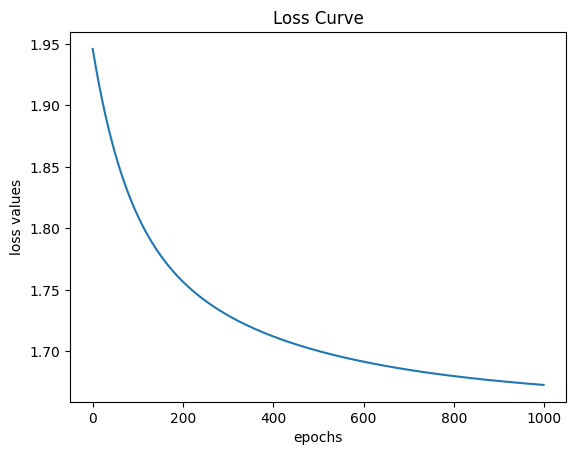

In [ ]:
# train the model
# TODO\
weights, bias, lossvals= logistic_regression(x_train,y_train)
# plot the loss curve
plt.plot(lossvals)
plt.xlabel("epochs")
plt.ylabel("loss values")
plt.title("Loss Curve")
plt.show()
# TODO

### 3.5 Evaluation (10+1+4+3+2 = 20pts)

Write a function to predict the labels of X_test using the model trained above and return the predicted labels as categorical values similar to train labels. **(10pts)**

Note: By default, the predicted labels may return values within [0-6] instead of the original labels [3-9]. This can happen due to using argmax() to get label encoding from one-hot encoding when predicting test labels. You can add a simple offset to the argmax outputs of predicted labels to shift them to the range of [3-9]. This is important to note as you may see a very low accuracy even with a good model if true labels and predicted labels are not associated with the same categorical scale.

In [ ]:
def predict(X_test, W, b):
    '''
    X_test: a numpy array of testing features
    W: a numpy array of weights
    b: a numpy array of bias
    return: a numpy array of one-hot encoded labels
    '''
    # compute the scores
    # TODO
    z = np.dot(X_test,W) + b
    # compute the probabilities
    # TODO
    s = softmax(z)
    # get the predicted labels
    # TODO
    y_pred = np.argmax(s,axis = 1) + np.min(y_train)
    # return the predicted labels
    # TODO
    return y_pred


**3.5.1** import accuracy_score, confusion_matrix, precision_score, recall_score and f1_score from scikitlearn **(1pts)**

In [ ]:
# TODO
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

**3.5.2** Print the prediction scores on test data in terms of accuracy, precision and recall score. **(4pts)**

In [ ]:
# TODO
y_pred = predict(x_test, weights, bias)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy ", accuracy)
precision = precision_score(y_test, y_pred, average = 'macro')
print("precision ", precision)
recall = recall_score(y_test, y_pred, average = 'macro')
print("recall ", recall)

accuracy  0.4369230769230769
precision  0.2096460228187524
recall  0.24176047535099915


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**3.5.3** Generate and visualize the confusion matrix. You can use seaborn heatmap to visualize a heatmap of the confusion matrix. **(3pts)**

<Axes: >

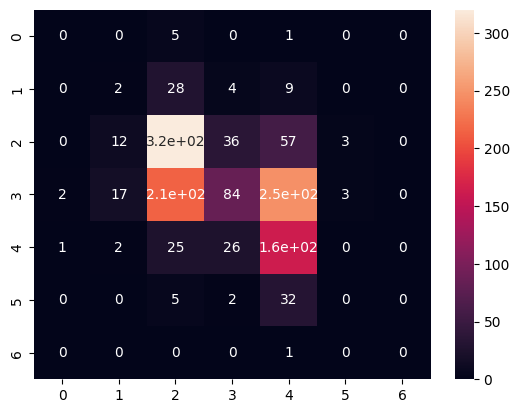

In [ ]:
# TODO
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True,annot_kws={'size': 10})

**3.5.4** Which labels seem to be harder to classify for this model? **(2pts)**


label 6 is the hardest to predict. which is connected to column 3 of the heatmap above.

## 4. Using Scikitlearn Logistic Regression (4+2+7+2 = 15pts)

### 4.1 Import LogisticRegressionCV module and create an instance of it. (4pts)
Use the following parameters:
1. 5-fold crossvalidation,
2. lbfgs solver,
3. run for 1000 iterations
4. use 'multinomial' for choosing softmax classifier  

In [ ]:
# TODO
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(cv = 5, solver = "lbfgs", max_iter = 1000,multi_class = 'multinomial' )

### 4.2 Train the model and predict the labels for test set. (2pts)

In [ ]:
# TODO
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


### 4.3 Compute the accuracy, precision, recall and F1 scores. Also visualize the confusion matrix. (1+1+1+1+3 =7pts)

accuracy 0.5346153846153846
recal 0.22197211090800478
f1 0.2238097791050296


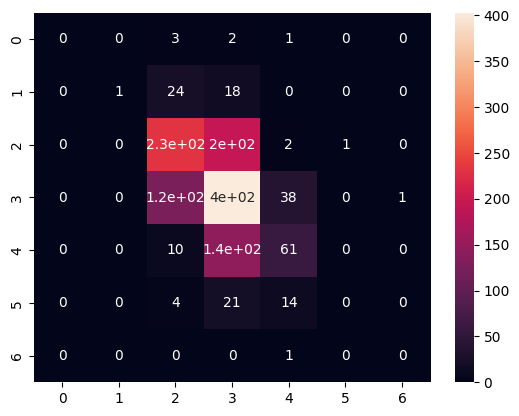

In [ ]:
# TODO
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
ac = accuracy_score(y_test, y_pred)
print("accuracy", ac)
recal = recall_score(y_test, y_pred, average = 'macro')
print("recal", recal)
f1 = f1_score(y_test, y_pred, average = 'macro')
print("f1", f1)
conM = confusion_matrix(y_test, y_pred)
sns.heatmap(conM, annot = True,annot_kws={'size': 10})
plt.show()

### 4.4 Did your previous model (built from scratch) and the model from scikitlearn library produced similar evaluation scores? (2pts)

Explain (in <100 words) the similarity and dissimilarity in score. What changed, what didn't, and why?

it seems as thought they produced simmilar evaluations. The only notable differences are the accuracy which about 10% higher from the sklearn logistic regression. and the confusion matrix was also slightly different with the self confusion matrix showing a wide range and amount of values on the heat map.

## 5. Using Scikitlearn Multi-layer Perceptron (16+19 = 35pts)

### 5.1 MLP with one hidden layer and stochastic gradient descent optimizer (4+2+1+7+2 = 16pts)

**5.1.1** Import MLPClassifier from scikitlearn's neural_network library. Then create a model instance of this classifier.

Use the following parameters:
1. One hidden layer with 100 neurons,
2. ReLu activation,
3. Stochastic Gradient Descent solver
4. Learning rate = 0.01 (or you can continue to use your previous learning rate)
5. No of epoch = 1000

Also, set random_state to a fixed value so that your result is reproducible. **(4pts)**

In [ ]:
# TODO
from sklearn.neural_network import MLPClassifier

mlC = MLPClassifier(hidden_layer_sizes = 100, activation = 'relu', solver = 'sgd',learning_rate_init=.01, max_iter = 1000, random_state= 42)

**5.1.2** Train the model with training set.
Then predict the labels for test set. **(2pts)**

In [ ]:
# TODO
mlC.fit(x_train, y_train)
y_pred = mlC.predict(x_test)
print(y_pred)

[6 6 6 ... 7 5 6]


**5.1.3** Plot the loss curve **(1pt)**

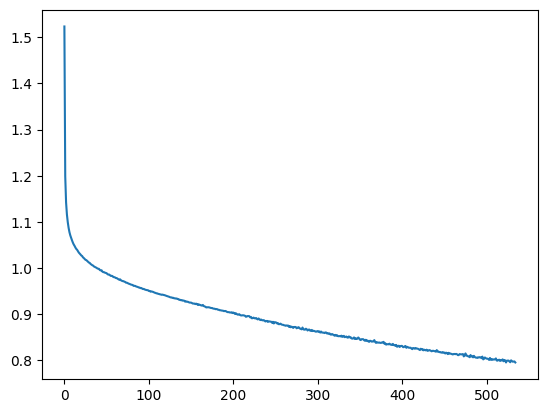

In [ ]:
# TODO
plt.plot(mlC.loss_curve_)
plt.show()


**5.1.4** Print the accuracy, precision, recall and F1 scores. Also show the confusion matrix. **(1+1+1+1+3 = 7pts)**

accuracy 0.5615384615384615
recal 0.2531277322678778
f1 0.2599321936897199


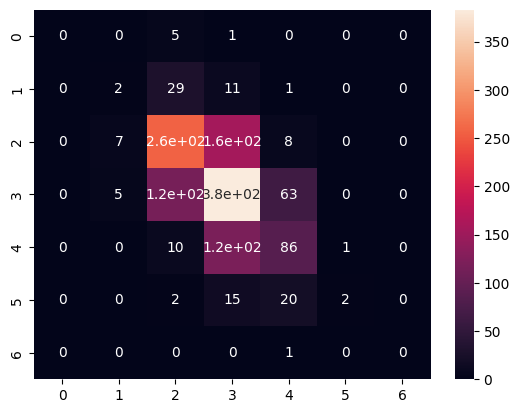

In [ ]:
# TODO
ac = accuracy_score(y_test, y_pred)
print("accuracy", ac)
recal = recall_score(y_test, y_pred, average = 'macro')
print("recal", recal)
f1 = f1_score(y_test, y_pred, average = 'macro')
print("f1", f1)
conM = confusion_matrix(y_test, y_pred)
sns.heatmap(conM, annot = True,annot_kws={'size': 10})
plt.show()

**5.1.5** Did you see any change in scores after using the MLP classifier?

In <100 words, describe your observation. **(2pts)**

/ # TODO

### 5.2 MLP with two hidden layer and adam optimizer (4+2+1+7+2+3 = 19pts)

**5.2.1** Import MLPClassifier from scikitlearn's neural_network library. Then create a model instance of this classifier.

Use the following parameters:
1. **Two** hidden layers with 100 neurons,
2. ReLu activation,
3. Adam solver (this is an advanced optimizer which we did not cover in class. However the usage is quite straightforward)
4. Learning rate = 0.01 (or you can continue to use your previous learning rate)
5. No of epoch = 1000

Also, set random_state to a fixed value so that your result is reproducible. **(4pts)**

(Refer to the scikitlearn documentation for clarification on the parameters)

In [ ]:
# TODO

mlP2 = MLPClassifier(hidden_layer_sizes = (100,2), activation = 'relu', solver = 'adam',learning_rate_init=.01, max_iter = 1000, random_state= 42)

**5.2.2** Train the model with training set.
Then predict the labels for test set. **(2pts)**

In [ ]:
# TODO
# TODO
mlP2.fit(x_train, y_train)
y_pred = mlC.predict(x_test)

**5.2.3** Plot the loss curve **(1pt)**

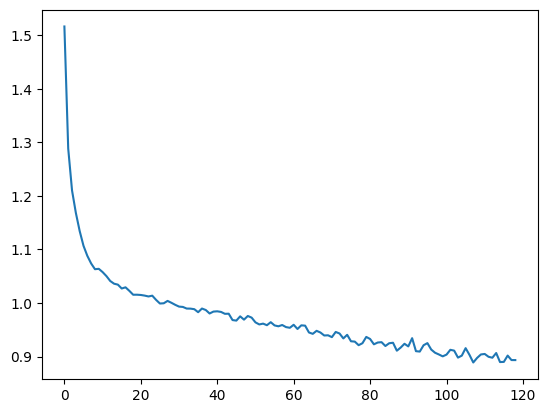

In [ ]:
# TODO
plt.plot(mlP2.loss_curve_)
plt.show()

**5.2.4** Print the accuracy, precision, recall and F1 scores. Also show the confusion matrix. **(1+1+1+1+3 = 7pts)**

accuracy 0.5615384615384615
recal 0.2531277322678778
f1 0.2599321936897199


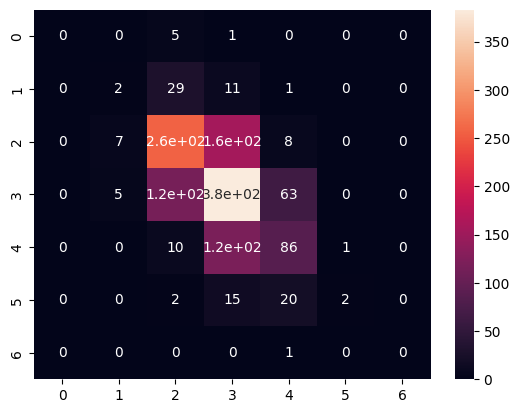

In [ ]:
# TODO
# TODO
ac = accuracy_score(y_test, y_pred)
print("accuracy", ac)
recal = recall_score(y_test, y_pred, average = 'macro')
print("recal", recal)
f1 = f1_score(y_test, y_pred, average = 'macro')
print("f1", f1)
conM = confusion_matrix(y_test, y_pred)
sns.heatmap(conM, annot = True,annot_kws={'size': 10})
plt.show()

**5.2.5** Describe any difference in the loss curve from MLP with one hidden layer and MLP with two hidden layer. **(2pts)**

One notable difference between one and two hidden layers is that is the how fast or slow the loss increases the two hidden layer went faster then the one hidden layer.

**5.2.6** Did you see any change in scores between the two MLP models?

In <100 words, describe your observation. **(3pts)**

their are no differences inbetween the scores.